# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Load the Dataset

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')


## Category "Status" to continuous ##
for index, row in df.iterrows():
    if row['Status'] == "Developing":
        df.at[index, 'Status'] = 0
    else:
        df.at[index, 'Status'] = 1

        

## Min-Max normalisation ##

df_normalised = df.copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalised[['Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition of Resources', 'Schooling']] = scaler.fit_transform(df_normalised[['Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition of Resources', 'Schooling']])

df_normalised = df_normalised.dropna() ## if NaN are causing too much trouble
df_normalised



## Date data split ##

D_train = df_normalised[df_normalised['Year'] <= 2011]
D_train_X = D_train.drop(columns = ['Life Expectancy', 'Country']).copy()
D_train_y = D_train['Life Expectancy']

D_val = df_normalised[(df_normalised['Year'] > 2011) & (df_normalised['Year'] <= 2013)]
D_val_X = D_val.drop(columns = ['Life Expectancy', 'Country']).copy()
D_val_y = D_val['Life Expectancy']

D_test = df_normalised[df_normalised['Year'] > 2013]
D_test_X = D_test.drop(columns = ['Life Expectancy', 'Country']).copy()
D_test_y = D_test['Life Expectancy']


## Output ##
D_train_X.to_csv('D_train_X.csv', sep=',', encoding='utf-8', index=False)
D_train_y.to_csv('D_train_y.csv', sep=',', encoding='utf-8', index=False)

D_val_X.to_csv('D_val_X.csv', sep=',', encoding='utf-8', index=False)
D_val_y.to_csv('D_val_y.csv', sep=',', encoding='utf-8', index=False)

D_test_X.to_csv('D_test_X.csv', sep=',', encoding='utf-8', index=False)
D_test_y.to_csv('D_test_y.csv', sep=',', encoding='utf-8', index=False)



## Random data split ##

df_normalised_X = df_normalised.drop(columns = ['Life Expectancy', 'Country']).copy()
df_normalised_y = df_normalised['Life Expectancy']

train_X, test_X, train_y, test_y = train_test_split(df_normalised_X, df_normalised_y, test_size=0.2, random_state=1)

test_X, val_X, test_y, val_y = train_test_split(test_X, test_y, test_size=0.5, random_state=1)

## Output ##
train_X.to_csv('train_X.csv', sep=',', encoding='utf-8', index=False)
train_y.to_csv('train_y.csv', sep=',', encoding='utf-8', index=False)

val_X.to_csv('val_X.csv', sep=',', encoding='utf-8', index=False)
val_y.to_csv('val_y.csv', sep=',', encoding='utf-8', index=False)

test_X.to_csv('test_X.csv', sep=',', encoding='utf-8', index=False)
test_y.to_csv('test_y.csv', sep=',', encoding='utf-8', index=False)

In [3]:
print(str(len(train_X)) + " items in the training set")
print(str(len(test_X)) + " items in the testing set")

1319 items in the training set
165 items in the testing set


# Main Code

Take note that this vanilla Linear Regression function is the Ordinary Least Squared model

In [4]:
lr = LinearRegression()
lr.fit(train_X, train_y)

LinearRegression()

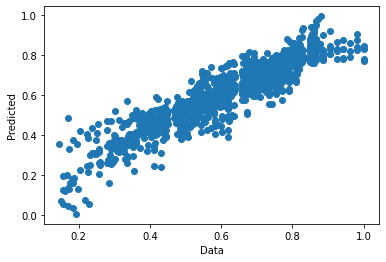

MSE:0.0046245137503295956


In [5]:
y_pred_train = lr.predict(train_X)
plt.scatter(train_y, y_pred_train)
plt.xlabel("Data")
plt.ylabel("Predicted")
plt.show()
print("MSE:" + str(mean_squared_error(train_y, y_pred_train)))

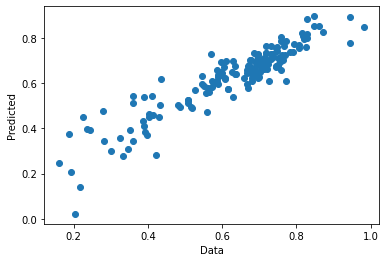

MSE: 0.004520931458746479


In [6]:
y_pred = lr.predict(test_X)
plt.scatter(test_y, y_pred)
plt.xlabel("Data")
plt.ylabel("Predicted")
plt.show()
print("MSE: " + str(mean_squared_error(test_y, y_pred)))

# Ridge Regression

In [7]:
rr = Ridge(alpha=1.0)
rr.fit(train_X, train_y)

Ridge()

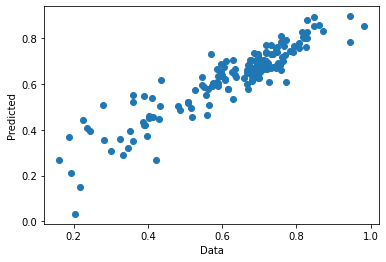

MSE: 0.004736677357094184


In [14]:
y_pred = rr.predict(test_X)
plt.scatter(test_y, y_pred)
plt.xlabel("Data")
plt.ylabel("Predicted")
plt.show()
print("MSE: " + str(mean_squared_error(test_y, y_pred)))

# Lasso Regression

In [19]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(train_X, train_y)

Lasso(alpha=0.1)

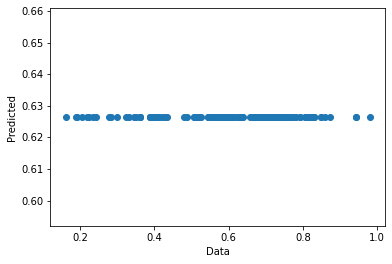

MSE: 0.028489264784000545


In [20]:
y_pred = lasso_reg.predict(test_X)
plt.scatter(test_y, y_pred)
plt.xlabel("Data")
plt.ylabel("Predicted")
plt.show()
print("MSE: " + str(mean_squared_error(test_y, y_pred)))

# Elastic Net

In [21]:
en = ElasticNet(random_state=0)
en.fit(train_X, train_y)

ElasticNet(random_state=0)

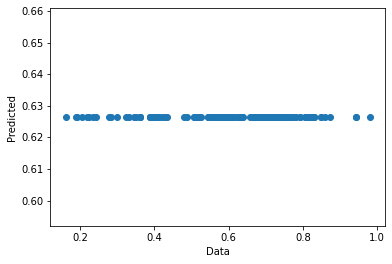

MSE: 0.028489264784000545


In [22]:
y_pred = en.predict(test_X)
plt.scatter(test_y, y_pred)
plt.xlabel("Data")
plt.ylabel("Predicted")
plt.show()
print("MSE: " + str(mean_squared_error(test_y, y_pred)))